## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [1766]:
# Import libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [1767]:
# Load dataset
cc_apps = pd.read_csv('cc_approvals.data', header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [1768]:
cc_apps.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
404,b,34.00,5.085,y,p,i,bb,1.085,f,f,0,t,g,00480,0,-
305,b,48.75,26.335,y,p,ff,ff,0.000,t,f,0,t,g,00000,0,-
650,b,48.08,3.750,u,g,i,bb,1.000,f,f,0,f,g,00100,2,-
80,b,49.58,19.000,u,g,ff,ff,0.000,t,t,1,f,g,00094,0,-
377,b,20.67,0.835,y,p,c,v,2.000,f,f,0,t,s,00240,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,00180,1,-
476,b,23.58,0.835,u,g,i,h,0.085,f,f,0,t,g,00220,5,-
164,a,60.58,16.500,u,g,q,v,11.000,t,f,0,t,g,00021,10561,+
549,b,48.33,12.000,u,g,m,v,16.000,t,f,0,f,s,00110,0,+
461,b,24.08,0.875,u,g,m,v,0.085,f,t,4,f,g,00254,1950,-


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

Create a map to change column names:

{0: 'Male', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14: 'Income', 15: 'Approved'}

In [1769]:
col_map = {0: 'Male', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14: 'Income', 15: 'Approved'}
cc_apps.columns = cc_apps.columns.map(col_map)

cc_apps.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [1770]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps_missing_values = cc_apps.isnull().sum() # alt .values.any() for 'True' or 'False'
print(cc_apps_missing_values) 

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-

In [1771]:
cc_apps.tail(17) # shows the '?' value in the data set.
# This is also visible in the excel viewer extension (shown in next cell)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [1772]:
# convert the df to csv to be able to explore and find erronous values 
cc_apps.to_csv('dirty_cc.csv')


At this stage from looking at csv file in excel extension, I see there are several values with ? in them. I could filter these out now, but the instructions for this lab say to do this later.

<Axes: >

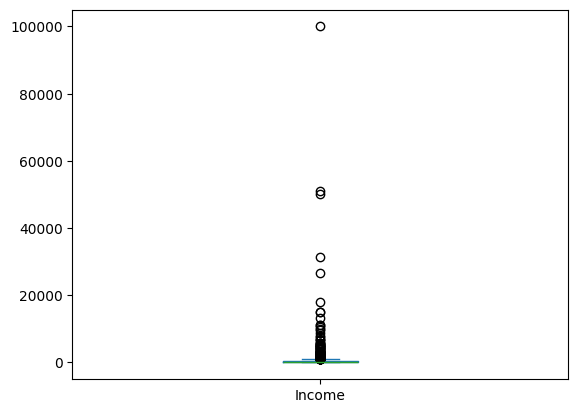

In [1773]:
# display box plots to show spread/outliars
cc_apps['Income'].plot(kind='box')

/var/folders/kv/hj3hcv552n5gxxw62d9pc7v40000gp/T/ipykernel_23319/3486408961.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cc_apps[columns_to_plot].values, labels=columns_to_plot)


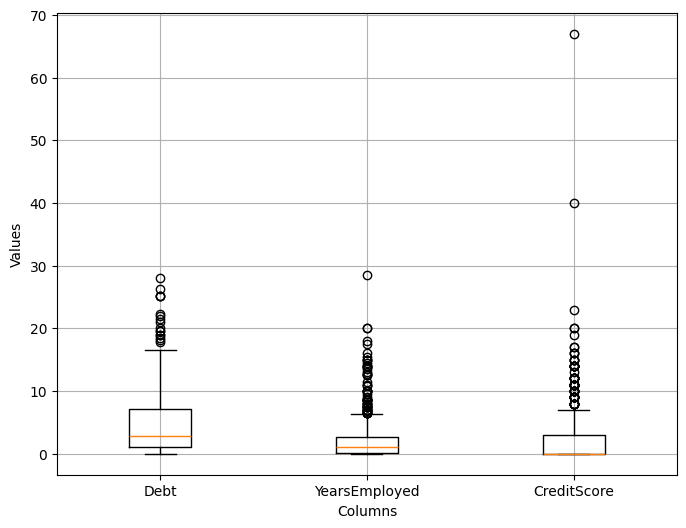

In [1774]:
# Plotting multiple columns on the same graph 

# Specify columns to plot
columns_to_plot = ['Debt', 'YearsEmployed', 'CreditScore'] # 'Income' was a massive outlier 

plt.figure(figsize=(8, 6))
plt.boxplot(cc_apps[columns_to_plot].values, labels=columns_to_plot)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

## 3. Splitting the dataset into train and test sets
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their <a href="https://realpython.com/numpy-scipy-pandas-correlation-python/">statistical correlation</a> to the labels of the dataset. But this is out of scope for this project. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [1775]:
# pip install scikit-learn

In [1776]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [1777]:
# Drop the features 11 and 13 
# 11: 'DriversLicense', 13: 'ZipCode'
cc_apps_dropped_cols = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_apps_dropped_cols.head() # check gone

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


Using the train_test_split() method, split the data into train and test sets
with a split ratio of 33% (test_size argument) and set
the random_state argument to 42. Assign the train and test DataFrames to the
following variables respectively: cc_apps_train, cc_apps_test.

Syntax: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X: This represents the feature matrix (input data) of shape (n_samples, n_features). It contains the input variables used to predict the target variable (y).

y: This represents the target vector (output data) of shape (n_samples,). It contains the values we want to predict based on X.

test_size: This parameter specifies the proportion of the dataset to include in the test split. It can be a float (between 0.0 and 1.0) representing the fraction of the dataset to include in the test split, or an integer specifying the absolute number of test samples. For example:

test_size=0.33 means 33% of the data will be used for testing.
test_size=100 means 100 samples will be used for testing.
train_size: This parameter specifies the proportion of the dataset to include in the train split. It is mutually exclusive with test_size and if specified, train_size will override test_size. If None, it will be set to 1 - test_size.

random_state: This parameter sets the random seed for reproducibility of the split. If an integer value is provided, train_test_split() will return the same split every time, which is useful for debugging and testing purposes. If None, a different random split will be generated every time train_test_split() is called.

In [1778]:
# Split into train and test sets with 33% for testing
cc_apps_train, cc_apps_test = train_test_split(cc_apps_dropped_cols, test_size=0.33, random_state=42)

In [1779]:
# check sets
cc_apps_train.info() # 462
cc_apps_test.info() # 228 

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 382 to 102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            462 non-null    object 
 1   Age             462 non-null    object 
 2   Debt            462 non-null    float64
 3   Married         462 non-null    object 
 4   BankCustomer    462 non-null    object 
 5   EducationLevel  462 non-null    object 
 6   Ethnicity       462 non-null    object 
 7   YearsEmployed   462 non-null    float64
 8   PriorDefault    462 non-null    object 
 9   Employed        462 non-null    object 
 10  CreditScore     462 non-null    int64  
 11  Citizen         462 non-null    object 
 12  Income          462 non-null    int64  
 13  Approved        462 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 54.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 286 to 311
Data columns (total 14 columns):
 #   Column 

In [1780]:
# Keeping track of features (columns)
print(f"The number of variables before using drop() was {cc_apps.shape[1]} and after is {cc_apps_dropped_cols.shape[1]}.")

The number of variables before using drop() was 16 and after is 14.


## 4. Handling the missing values (part i)
<p>Now we've split our data, we can handle some of the issues we identified when inspecting the DataFrame, including:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output of the second task.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

![alt text](<Screenshot 2024-07-08 at 12.10.12.png>)

In [1781]:
print(col_map)

{0: 'Male', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14: 'Income', 15: 'Approved'}


In [1782]:
# Replace the '?'s with NaN in the train and test sets
cc_apps_train.replace('?', np.nan, inplace=True) # inpace=True means no need to assign to a new df variable
cc_apps_test.replace('?', np.nan, inplace=True) 

## 5. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA). </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [1783]:
#check data types 
cc_apps_train.info() # all 4 number columns are float64 or int64 for both dfs 

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 382 to 102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            454 non-null    object 
 1   Age             457 non-null    object 
 2   Debt            462 non-null    float64
 3   Married         456 non-null    object 
 4   BankCustomer    456 non-null    object 
 5   EducationLevel  455 non-null    object 
 6   Ethnicity       455 non-null    object 
 7   YearsEmployed   462 non-null    float64
 8   PriorDefault    462 non-null    object 
 9   Employed        462 non-null    object 
 10  CreditScore     462 non-null    int64  
 11  Citizen         462 non-null    object 
 12  Income          462 non-null    int64  
 13  Approved        462 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 54.1+ KB


In [1784]:
# find mean values of each set 
mean_train = cc_apps_train[['Debt','YearsEmployed', 'CreditScore', 'Income']].mean()
mean_test = cc_apps_test[['Debt','YearsEmployed', 'CreditScore', 'Income']].mean()

# Impute NaNs in training set with mean
cc_apps_train.fillna(mean_train, inplace=True)

# Impute NaNs in testing set with mean
cc_apps_test.fillna(mean_test, inplace=True)



In [1785]:
# Count the number of NaNs in the datasets and print the counts to verify
nan_count_training = cc_apps_train.isnull().sum()
nan_count_testing = cc_apps_test.isnull().sum()

#print(nan_count_testing) all 0s
#print(nan_count_training) all 0s

In [1786]:
cc_apps_test.sample(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
621,b,22.67,0.165,u,g,c,j,2.250,f,f,0,s,0,+
165,a,40.83,10.000,u,g,q,h,1.750,t,f,0,g,837,+
231,a,47.42,3.000,u,g,x,v,13.875,t,t,2,g,1704,+
265,b,17.08,0.085,y,p,c,v,0.040,f,f,0,g,722,-
250,b,40.25,21.500,u,g,e,z,20.000,t,t,11,g,1200,+


## 6. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this is why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>

In [1787]:
#cc_apps_train['Age'].mode() # checking the mode code 

In [1788]:
# Count the number of NaNs in the dataset and print the counts to verify
object_nan_count_training = cc_apps_train.isna().sum()
object_nan_count_testing = cc_apps_test.isna().sum()
print(object_nan_count_training)
print(object_nan_count_testing)

Male              8
Age               5
Debt              0
Married           6
BankCustomer      6
EducationLevel    7
Ethnicity         7
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64
Male              4
Age               7
Debt              0
Married           0
BankCustomer      0
EducationLevel    2
Ethnicity         2
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64


In [1789]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtype == 'object':
        
        # Impute with the most frequent value
        # Find mode of the col
        most_frequent_value = cc_apps_train[col].mode()[0] # NEEDS indexing since mode() returns a Pandas Series containing values sorted in ascending order

        # Impute missing values in cc_apps_train with the mode
        cc_apps_train[col].fillna(most_frequent_value, inplace=True)
        # Impute missing values in cc_apps_test with the mode from cc_apps_train
        cc_apps_test[col].fillna(most_frequent_value, inplace=True) 



In [1790]:
# Count the number of NaNs in the dataset and print the counts to verify
object_nan_count_training_1 = cc_apps_train.isna().sum()
object_nan_count_testing_1 = cc_apps_test.isnull().sum()
print(object_nan_count_training_1)
print(object_nan_count_testing_1)

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64
Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64


In [1791]:
# check in csv files 
cc_apps_train.to_csv('clean_training.csv')
cc_apps_test.to_csv('clean_testing.csv')

## 7. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the <code>get_dummies()</code> method from pandas.</p>

Convert categorical variable into dummy/indicator variables.

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

By reindexing the columns, you ensure that both the training and test datasets are aligned and have the same features in the same order, which is crucial for training machine learning models and making predictions on new data.

In [1792]:
cc_apps_test

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
286,a,23.58,1.50,u,g,ff,ff,0.000,f,t,2,g,105,-
511,a,46.00,4.00,u,g,j,j,0.000,t,f,0,g,960,+
257,b,20.00,0.00,u,g,d,v,0.500,f,f,0,g,0,-
336,b,47.33,6.50,u,g,c,v,1.000,f,f,0,g,228,-
318,b,19.17,0.00,y,p,m,bb,0.000,f,f,0,s,1,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,a,20.83,0.50,y,p,e,dd,1.000,f,f,0,g,0,-
234,a,58.42,21.00,u,g,i,bb,10.000,t,t,13,g,6700,+
644,b,36.17,0.42,y,p,w,v,0.290,f,f,0,g,2,-
271,b,32.33,2.50,u,g,c,v,1.250,f,f,0,g,0,-


In [1793]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

In [1794]:
# convert bools to binary digits 1/0
cc_apps_train = cc_apps_train.astype(int)
cc_apps_test = cc_apps_test.astype(int)

In [1795]:
# drop approved_- column 
cc_apps_train = cc_apps_train.drop(columns=['Approved_-'])
cc_apps_test = cc_apps_test.drop(columns=['Approved_-'])

In [1796]:
# correlation matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = cc_apps_train.corr()

In [1797]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [1798]:
# Define a threshold for low correlation
low_corr_threshold = 0.10

# Identify columns with low correlation to the target variable 'approved_+'
low_corr_columns = corr_matrix.index[(corr_matrix['Approved_+'].abs() < low_corr_threshold)].tolist()

# Print the columns with low correlation
print("Columns with low correlation:", low_corr_columns)

Columns with low correlation: ['Male_a', 'Male_b', 'Age_13.75', 'Age_15.83', 'Age_15.92', 'Age_16.00', 'Age_16.08', 'Age_16.25', 'Age_16.33', 'Age_16.50', 'Age_16.92', 'Age_17.08', 'Age_17.25', 'Age_17.42', 'Age_17.50', 'Age_17.58', 'Age_17.67', 'Age_17.83', 'Age_17.92', 'Age_18.00', 'Age_18.08', 'Age_18.17', 'Age_18.25', 'Age_18.33', 'Age_18.42', 'Age_18.58', 'Age_18.67', 'Age_18.75', 'Age_18.83', 'Age_18.92', 'Age_19.00', 'Age_19.17', 'Age_19.33', 'Age_19.42', 'Age_19.50', 'Age_19.58', 'Age_19.67', 'Age_20.00', 'Age_20.08', 'Age_20.17', 'Age_20.25', 'Age_20.33', 'Age_20.42', 'Age_20.50', 'Age_20.67', 'Age_20.75', 'Age_20.83', 'Age_21.00', 'Age_21.08', 'Age_21.17', 'Age_21.33', 'Age_21.42', 'Age_21.50', 'Age_21.75', 'Age_21.92', 'Age_22.00', 'Age_22.08', 'Age_22.17', 'Age_22.25', 'Age_22.33', 'Age_22.42', 'Age_22.50', 'Age_22.58', 'Age_22.67', 'Age_22.75', 'Age_22.92', 'Age_23.00', 'Age_23.08', 'Age_23.17', 'Age_23.33', 'Age_23.42', 'Age_23.50', 'Age_23.75', 'Age_23.92', 'Age_24.08', 

In [1799]:
# Drop these columns from the DataFrame
cc_apps_train = cc_apps_train.drop(columns=low_corr_columns)

# Print the reduced DataFrame's columns to verify
print("Columns after dropping low-correlation features:", cc_apps_train.columns.tolist())

Columns after dropping low-correlation features: ['Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Age_23.25', 'Age_23.58', 'Married_u', 'Married_y', 'BankCustomer_g', 'BankCustomer_p', 'EducationLevel_cc', 'EducationLevel_ff', 'EducationLevel_i', 'EducationLevel_k', 'EducationLevel_q', 'EducationLevel_x', 'Ethnicity_ff', 'Ethnicity_h', 'PriorDefault_f', 'PriorDefault_t', 'Employed_f', 'Employed_t', 'Citizen_s', 'Approved_+']


In [1800]:
# drop same cols from test set
cc_apps_test = cc_apps_test.drop(columns=low_corr_columns)

## 8. Preprocessing the data (part ii)
<p>Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [1801]:
from sklearn.preprocessing import MinMaxScaler

This scaler transforms features by scaling each feature to a given range (by default between 0 and 1). It effectively linearly transforms each feature such that it falls within the specified range.

In [1802]:
cc_apps_train.head()

,Debt,YearsEmployed,CreditScore,Income,Age_23.25,Age_23.58,Married_u,Married_y,BankCustomer_g,BankCustomer_p,...,EducationLevel_q,EducationLevel_x,Ethnicity_ff,Ethnicity_h,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,Citizen_s,Approved_+
382,2,4,0,456,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
137,2,4,6,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1
346,1,0,0,122,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
326,1,0,0,179,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
33,5,5,0,4000,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1


In [1803]:
# Segregate features and labels into separate variables
# features are independent variables (input) and labels are dependent variables (output)

#X_train, y_train = cc_apps_train.iloc[:, :-2].values, cc_apps_train.iloc[:, [-2]].values
#X_test, y_test = cc_apps_test.iloc[:, :-2].values, cc_apps_test.iloc[:, [-2]].values
# leave out both of the 'approved' columns from features
# For labels, it's typical to choose the one column representing the positive class (e.g., approved_+).

In [1804]:
X_train, y_train = cc_apps_train.iloc[:, :-1].values, cc_apps_train.iloc[:, [-1]].values
X_test, y_test = cc_apps_test.iloc[:, :-1].values, cc_apps_test.iloc[:, [-1]].values

In [1805]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler() # auto is from 0 to 1 
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [1806]:
# Import LogisticRegression Class
from sklearn.linear_model import LogisticRegression

In [1807]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train.ravel()) 

LogisticRegression()

.ravel() is used to flatten a numpy multi-dimensional array into a one-dimensional array. 

Original array: # 2D array (a column vector)
 [[1]
 [2]
 [3]
 [4]]
Shape of original array: (4, 1)
Flattened array:
 [1 2 3 4]
Shape of flattened array: (4,)

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [1808]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [1809]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
accuracy = logreg.score(rescaledX_test, y_test)

print("Accuracy of logistic regression classifier: ", round(accuracy*100, 2) , "%.")

# Print the confusion matrix of the logreg model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('[[TP   FP] \n [FN   TN]]') 


Accuracy of logistic regression classifier:  85.96 %.
Confusion Matrix:
[[102  23]
 [  9  94]]
[[TP   FP] 
 [FN   TN]]


This code trains a logistic regression model to predict whether a credit card application is approved or not based on various features of the application. It then evaluates the model's performance. 

Step1: prep data
Features: These are the columns used to make predictions (e.g., age, debt, etc.).
Target: This is the column we want to predict (Approved).
X_train and X_test: These are the features of the training and test sets, respectively.
y_train and y_test: These are the target values (approved or not) for the training and test sets.
    X_train, y_train = cc_apps_train[features].values, cc_apps_train[target].values
    X_test, y_test = cc_apps_test[features].values, cc_apps_test[target].values

Step2: scaling features 
Features like age and income can have very different ranges. Scaling ensures that all features are on a similar scale (from 0 to 1), which helps many machine learning algorithms work better.
    scaler = MinMaxScaler()
    rescaledX_train = scaler.fit_transform(X_train)
    rescaledX_test = scaler.transform(X_test)

Step3: Training 
Logistic Regression: This is a type of model used for binary classification (e.g., yes/no, approved/not approved). It predicts the probability that a given input belongs to a certain class.
    logreg = LogisticRegression()
Fitting: The fit method trains the logistic regression model on the training data.
    logreg.fit(rescaledX_train, y_train.ravel())

Step4: Evaluate model 
Accuracy: This is the proportion of correct predictions made by the model. An accuracy of 0.95 means the model is correct 95% of the time.
    accuracy = logreg.score(rescaledX_test, y_test)
    print(f"Accuracy score: {accuracy:.2f}")

Step5: Making Predictions
Predicting: The predict method uses the trained model to make predictions on the test data
    y_pred = logreg.predict(rescaledX_test)

Step6: Confusion matrix
Confusion Matrix: This is a table that describes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.

True Positives (TP): Correctly predicted positive cases.

True Negatives (TN): Correctly predicted negative cases.

False Positives (FP): Incorrectly predicted positive cases (predicted positive but actually negative).

False Negatives (FN): Incorrectly predicted negative cases (predicted negative but actually positive).
    
    conf_matrix = confusion_matrix(y_test, y_pred)

## 11. Grid searching and making the model perform better
<p>Our model was pretty good! In fact it was able to yield an accuracy score of 100%.</p> # wroooong.
<p>For the confusion matrix, the last element of the of the second row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the first element of the first row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>But if we hadn't got a perfect score what's to be done?. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [1810]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [1811]:
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

The param_grid dictionary itself does not directly make the model better. Instead, it facilitates a process called grid search which is used to find the best combination of hyperparameters for a machine learning mode.

While param_grid itself doesn't directly improve the model, it enables the GridSearchCV process to explore and find the best hyperparameters for your logistic regression model. This, in turn, can lead to a model that generalizes better to unseen data and performs better overall on your specific task or problem.

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

Call the best_score_ and best_params_ attributes on
the grid_model_result variable, then print both.

In [1812]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
# logreg is the model want to optimise
# This is the dictionary of hyperparameters defined earlier
# Number of cross-validation folds (here cv=5 means 5-fold cross-validation which means the dataset will be split into 5 parts, and the model will be trained and validated 5 times, each time using a different fold as the validation set

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train.ravel())


In [1813]:
# Summarize results
best_score = grid_model_result.best_score_ 
best_params = grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
test_accuracy = best_model.score(rescaledX_test, y_test) # computes the accuracy of the best model on the test set.
print("Accuracy of logistic regression classifier: ", round(test_accuracy * 100, 2), "%.")

Best: 0.865755 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  85.09 %.


Parameters vs Hyperparameters:

Parameters: These are internal settings learned by the model during training, like weights in a neural network.
Hyperparameters: These are external settings that you choose before training begins. They control the learning process and affect how the model learns from the data.

Why They Matter:

Performance: Choosing the right hyperparameter values can significantly improve a model's accuracy and ability to generalize to new data.
Tuning: Finding optimal values often involves trying different combinations and evaluating which settings work best for your specific problem.

Tuning Hyperparameters:

Methods: Techniques like grid search or random search are used to systematically test different hyperparameter values and find the best combination.
Goal: To find settings that maximize the model's performance on unseen data while preventing it from memorizing the training data (overfitting).